<a href="https://colab.research.google.com/github/poonamaswani/DataScienceAndAI/blob/main/CAM_DS_C101_Demo_4_1_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!

# Demonstration 4.1.4 Data cleaning: Outliers

A financial analyst plans to create a chart that simulates the short-term moving average of a client's portfolio over 100 days. During the initial review of the raw data, the analyst observed some outliers.

He needs to investigate whether the outliers are due to data errors and assess their potential overall effect on the client's portfolio performance. After a thorough investigation, he confirmed the outliers pertain to data errors.

Follow the demonstration to explore the importance of **handling outliers** based on sound business knowledge. In this demonstration, you will learn:
- how to identify and remove outliers
- the impact of identifying and removing outliers.

In [ ]:
# Import the necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Import the identify_features.csv file (data set) from GitHub with a url.
url = "https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/outliers_data.csv"

# Read the CSV file into a new DataFrame.
df = pd.read_csv(url)

# Display the first few rows of the DataFrame.
print(df.shape)
df.head()

(100, 2)


,X,Y
0,1,6.967142
1,2,2.617357
2,3,12.476885
3,4,23.230299
4,5,7.658466


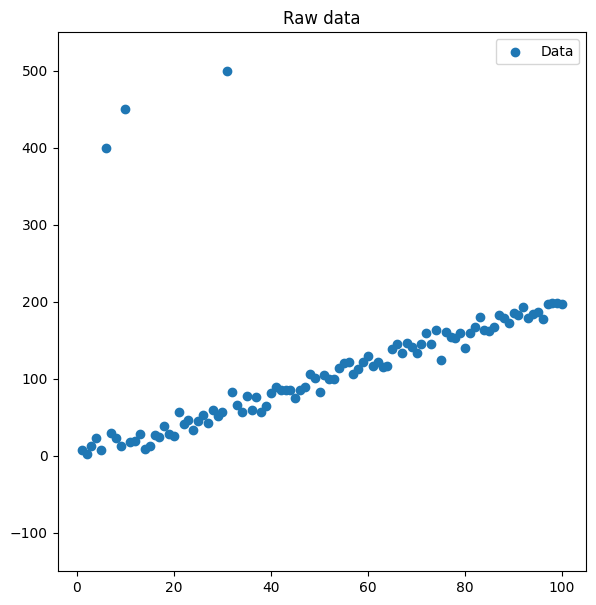

In [ ]:
# Plot the results.
plt.figure(figsize=(15, 7))

# Plot the raw data with outliers.
plt.subplot(1, 2, 1)
plt.scatter(df['X'], df['Y'], label='Data')
plt.ylim(-150, 550)  # Fix the y-axis scale.
plt.title('Raw data')
plt.legend()

In [ ]:
# Use the IQR method to identify the outliers.
Q1 = df['Y'].quantile(0.25)
Q3 = df['Y'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove the outliers.
df_clean = df[(df['Y'] > lower_bound) & (df['Y'] < upper_bound)]

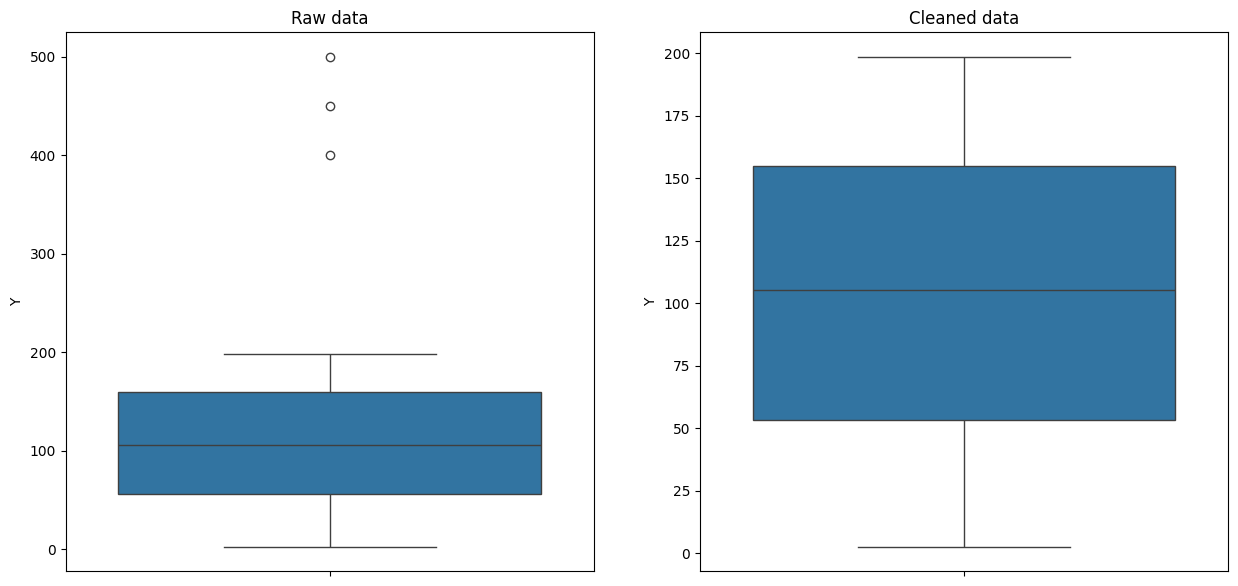

In [ ]:
# Plot the raw data.
plt.figure(figsize=(15, 7))

plt.subplot(1,2,1)
sns.boxplot(df['Y'])
plt.title('Raw data')

# Plot the cleaned data.
plt.subplot(1,2,2)
sns.boxplot(df_clean['Y'])
plt.title('Cleaned data')

# View the plot.
plt.show()

In [ ]:
# Fit a linear regression model on the raw data.
lr_raw = LinearRegression()
lr_raw.fit(df[['X']], df['Y'])
y_pred_raw = lr_raw.predict(df[['X']])

# Calculate MSE and R-squared for the model with outliers.
mse_raw = mean_squared_error(df['Y'], y_pred_raw)
r2_raw = r2_score(df['Y'], y_pred_raw)

In [ ]:
# Fit a linear regression model without outliers.
lr_clean = LinearRegression()
lr_clean.fit(df_clean[['X']], df_clean['Y'])
y_pred_clean = lr_clean.predict(df_clean[['X']])

# Calculate the MSE and R-squared for the model without outliers.
mse_clean = mean_squared_error(df_clean['Y'], y_pred_clean)
r2_clean = r2_score(df_clean['Y'], y_pred_clean)

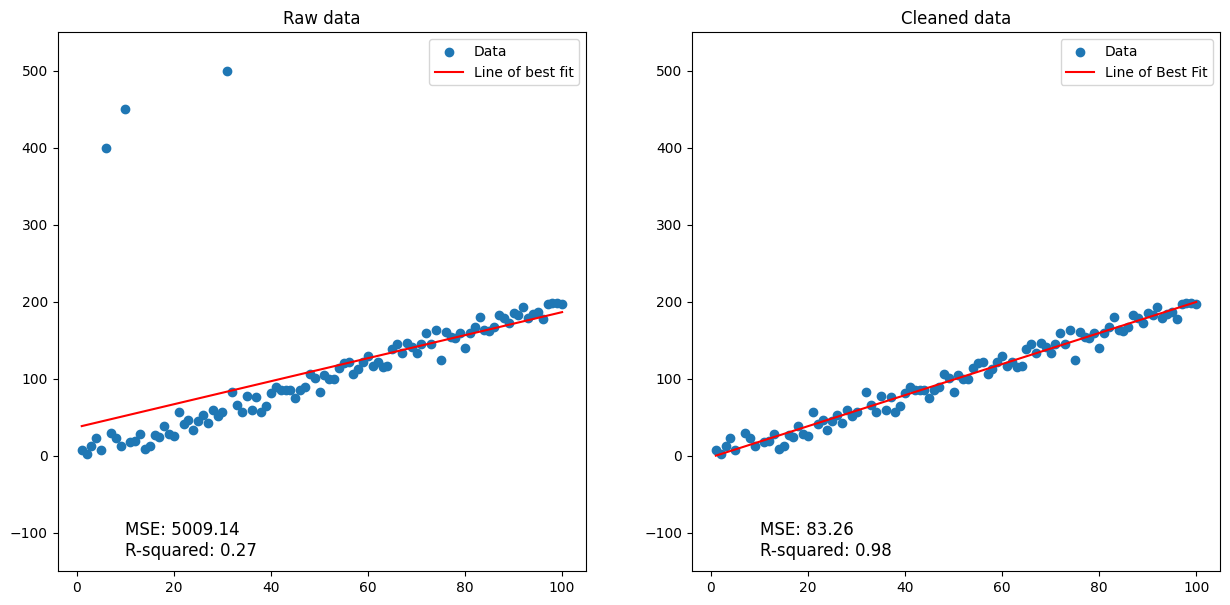

In [ ]:
# Plot the results.
plt.figure(figsize=(15, 7))

# With outliers.
plt.subplot(1, 2, 1)
plt.scatter(df['X'], df['Y'],
            label='Data')
plt.plot(df['X'], y_pred_raw,
         color='red', label='Line of best fit')
plt.ylim(-150, 550)  # Fix the y-axis scale
plt.title('Raw data')
plt.legend()
plt.text(10, -130,
         f'MSE: {mse_raw:.2f}\nR-squared: {r2_raw:.2f}',
         fontsize=12)

# Without outliers.
plt.subplot(1, 2, 2)
plt.scatter(df_clean['X'], df_clean['Y'],
            label='Data')
plt.plot(df_clean['X'], y_pred_clean,
         color='red', label='Line of Best Fit')
plt.ylim(-150, 550)  # Fix the y-axis scale
plt.title('Cleaned data')
plt.legend()
plt.text(10, -130,
         f'MSE: {mse_clean:.2f}\nR-squared: {r2_clean:.2f}',
         fontsize=12)

plt.show()

### Remove the outliers from the data before calculating MSE and R-squared

##### The model that has considered the outliers in the data will have higher MSE and lower R-squared values because of the impact of the outliers.

##### The linear model which took into consideration the outliers has clearly been influenced by the outliers. To gauage the impact, we will remove the outliers while evaluating MSE and R- squared and compare the parameters with that of the line that was not influenced by the outliers


In [ ]:
# Remove outliers using IQR.
Q1 = df['Y'].quantile(0.25)
Q3 = df['Y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers.
df_no_outliers = df[(df['Y'] >= lower_bound) & (df['Y'] <= upper_bound)]

# Calculate the MSE of the fitted line on data without outliers.
# Predict Y values using the original model.
predicted_Y_no_outliers = lr_raw.predict(df_no_outliers[['X']])

# Calculate MSE.
mse_no_outliers = mean_squared_error(df_no_outliers['Y'], predicted_Y_no_outliers)
print(f"MSE after removing outliers: {mse_no_outliers:.2f}")

MSE after removing outliers: 449.91


In [ ]:
# Manual calculation of R-squared for the data without outliers

# Calculate Total Sum of Squares (SST) for the filtered data.
y_mean_no_outliers = np.mean(df_no_outliers['Y'])
SST_no_outliers = np.sum((df_no_outliers['Y'] - y_mean_no_outliers) ** 2)

# Calculate Residual Sum of Squares (SSR) for the filtered data.
# Use the model fitted with all data to predict Y values for the filtered data.
y_pred_no_outliers = lr_raw.predict(df_no_outliers[['X']])
SSR_no_outliers = np.sum((df_no_outliers['Y'] - y_pred_no_outliers) ** 2)

# Calculate R-squared.
r_squared_no_outliers = 1 - (SSR_no_outliers / SST_no_outliers)
print(f"R-squared after removing outliers: {r_squared_no_outliers:.2f}")

R-squared after removing outliers: 0.87


In [ ]:
# Retrieve the equations of the lines.

# Coefficients of the raw line
slope = lr_raw.coef_[0]
intercept = lr_raw.intercept_

# Coefficients of the clean line (no outliers)
slope_clean = lr_clean.coef_[0]
intercept_clean = lr_clean.intercept_

print(f"Equation of the cleaned data line: y = {slope_clean:.2f}x + {intercept_clean:.2f}")
print(f"Equation of the raw data line: y = {slope:.2f}x + {intercept:.2f}")

Equation of the cleaned data line: y = 2.02x + -1.87
Equation of the raw data line: y = 1.50x + 37.04


You can compare the values of the slope and the intercept between the two different models.

$ Model_{clean} = -1.87 + 2.02 \times x$

$ Model_{raw} = 37.04 + 1.5 \times x$

# Key information
This demonstration illustrated the importance of understanding the business context when handling outliers. Before you can ignore or delete outliers, consider:
- Are the outliers a result of data errors?
- Are the outliers isolated incidents, and can the incidents be repeated?

## Reflect
What are the practical applications of this technique?

> Select the pen from the toolbar to add your entry.